In [1]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transform
 
from torch.utils.data import DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
import torch.optim as optim
import torch.nn.functional as F
import random


In [2]:
# ! pip install torchvision

seed는 마음대로

In [3]:
random.seed(777)
torch.manual_seed(777)

In [4]:
epochs = 30
batch_size = 100

In [5]:
mnist_train=dsets.MNIST(root='../data02/mnist_data/', 
                        train=True, transform=transform.ToTensor(),#텐서형태로 가지고 올게
                        download=True) 

mnist_test=dsets.MNIST(root='../data02/mnist_data/', 
                        train=False, transform=transform.ToTensor(),#테스트 데이터 텐서형태로 가지고 올게
                        download=True) 


In [6]:
print(mnist_test)
print(mnist_train)

Dataset MNIST
    Number of datapoints: 10000
    Root location: ../data02/mnist_data/
    Split: Test
    StandardTransform
Transform: ToTensor()
Dataset MNIST
    Number of datapoints: 60000
    Root location: ../data02/mnist_data/
    Split: Train
    StandardTransform
Transform: ToTensor()


한개의 데이터를 보자

data는 image이고 타켓이나 레이블을 쓰면.

In [7]:
mnist_train.data[0]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

In [8]:
mnist_train.targets[0]

tensor(5)

In [9]:
import os
import matplotlib.pyplot as plt
import numpy as np
os.environ['KMP_DUPLICATE_LIB_OK']='True' #충돌이나서 커널이 죽고 

def plot(x):
  img=(np.array(x.detach(), dtype='float')).reshape(28,28)
  plt.imshow(img, cmap='gray')
  plt.show()

C:\Users\it\AppData\Local\Temp\ipykernel_2496\2281618241.py:7: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  img=(np.array(x.detach(), dtype='float')).reshape(28,28)


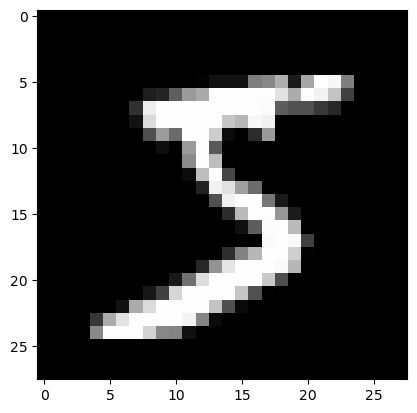

In [10]:
plot(mnist_train.data[0])

In [12]:
print(mnist_train.targets[1])

tensor(0)


데이터 로드함

In [14]:
train_loader = DataLoader(dataset=mnist_train, batch_size=batch_size,
                          shuffle=True,#100씩 섞어서 로드
                          drop_last=False #120씩 자르다보면 끝에 남은거 안지우고 부르겠다.
                          ) 

In [15]:
for X, Y in train_loader:
  print(X.size(), Y.size())
  #size([채널 1은 그레이, 레드는 3 100개데이터/채널/행/열  ])

torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([1

28*28 출력

In [16]:
print(28*28) #784 입력된 데이터

784


모델 만들자

In [ ]:
model = nn.Linear(784, 10, bias=True) #바이어스 사용함
criterion =nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

#100개 데이터는 6만개

In [18]:
print(len(train_loader)) #배치 수

600


4차원 데이터 100개를 행과 열이 곱해진 2차원으로 만들어서
모델에 넣어서 계산,

In [19]:
for epoch in range(epochs): #에폭은 30번, w와 b가 몇번 업데이트 되나 600번

  avg_cost=0 #epoch의 비용함수 평균 cost 600개의 평균을 넣겠다.
  total_batch = len(train_loader) 

  for X, Y in train_loader: #100개의 x,y값으로 작업
    X=X.view(-1, 28*28 ) #모양을 바꿔  ([100, 1, 28, 28]) -1은 크게 알아서 정해라 100될거임. 28*28은 가로세로를 펼친다는 뜻
    optimizer.zero_grad() #옵티마이저 초기화
    y_hat=model(X) 
    cost=criterion(y_hat, Y) #배치 100개의 cost
    cost.backward()
    optimizer.step()
    avg_cost+=cost

  avg_cost=avg_cost/total_batch
  print(f'epoch:{epoch}, cost:{avg_cost.item()}')
print('finished') #

epoch:0, cost:0.5355081558227539
epoch:1, cost:0.35954946279525757
epoch:2, cost:0.3313058614730835
epoch:3, cost:0.31678104400634766
epoch:4, cost:0.30744126439094543
epoch:5, cost:0.30028486251831055
epoch:6, cost:0.29524824023246765
epoch:7, cost:0.29064464569091797
epoch:8, cost:0.2875213027000427
epoch:9, cost:0.284511536359787
epoch:10, cost:0.28179726004600525
epoch:11, cost:0.27963924407958984
epoch:12, cost:0.2776736915111542
epoch:13, cost:0.2760351598262787
epoch:14, cost:0.2743489146232605
epoch:15, cost:0.2729761302471161
epoch:16, cost:0.271845281124115
epoch:17, cost:0.2704310715198517
epoch:18, cost:0.26933199167251587
epoch:19, cost:0.2682351768016815
epoch:20, cost:0.2675279378890991
epoch:21, cost:0.2665211856365204
epoch:22, cost:0.26573196053504944
epoch:23, cost:0.2646550238132477
epoch:24, cost:0.2639842927455902
epoch:25, cost:0.26327094435691833
epoch:26, cost:0.26239901781082153
epoch:27, cost:0.2617512047290802
epoch:28, cost:0.26112100481987
epoch:29, cost:0

시간이 많이 걸려 600개의 뱃치들을 평균구해야해.

훈련시킨 모델로 테스트해보자.

In [20]:
with torch.no_grad(): #기울기 하지마
  x_test=mnist_test.data.view(-1, 28*28).float() #2차원으로 만들
  y_test=mnist_test.targets
  predict = model(x_test) #한꺼번애 
  print(predict[:10])
  print(y_test[:10])


tensor([[  282.8630, -2835.6299,   309.9166,  1563.0024,  -808.1475,  -356.0789,
         -2339.7478,  2635.4167,   580.6801,   927.1034],
        [ 1559.7076,  -205.4500,  3033.4688,  1623.3032, -3562.9121,  1164.6309,
          1943.2416, -4902.1885,  1810.4971, -2596.0713],
        [-1550.5544,  1537.4357,   522.5293,   252.3965,  -628.6118,  -526.0690,
           -34.0387,   -78.4335,   704.3655,  -289.2208],
        [ 3292.6880, -3478.5806,   603.7605,   -41.3082, -1530.1039,    -8.0574,
           653.8621,  -302.2630,   637.1288,   174.4253],
        [ -113.6909, -2129.6484,   232.2328,  -762.0243,  1744.1768,  -918.8553,
           194.2128,    89.6497,   735.5417,   900.5214],
        [-1866.1399,  1895.2495,   444.4969,   485.4446,  -833.9858,  -912.5706,
          -655.1008,   297.6696,   994.9581,   111.5312],
        [-1122.8423, -2016.4946, -1483.0076,   -44.0486,  2176.2300,   276.6495,
          -475.1289,   152.1153,  1434.7156,  1041.0981],
        [-2226.6758,   353.

In [24]:
with torch.no_grad(): #기울기 하지마
  x_test=mnist_test.data.view(-1, 28*28).float() #2차원으로 만들
  y_test=mnist_test.targets
  predict = model(x_test) #모델로 예측한 값을 그냥 뿌리니까 한 행에 10개의 값으로 이뤄진걸
  # print(predict[:10])
  # print(torch.argmax(predict[:10],1)) #행단위로 높은 가장 값을 가지고 와라 7번쨰 자리가 커
  # print(y_test[:10]) #첫번쨰 행 7, 두번째 2번째 자리가 큰 수

  #정답 얼마나 맞췄나.
  corr_pred=torch.argmax(predict, 1) == y_test
  accuracy = corr_pred.float().mean() #전체겟수 만개니까 나누기 만해도 됨

  print(f'accuracy:{accuracy}') #만개중에 8720개 정도는 맞아. 87.2%

accuracy:0.8720999956130981


In [29]:
print(torch.argmax(model(x_test[0])))
print(y_test[0])

tensor(7)
tensor(7)


아이리스 데이터

In [69]:
import seaborn as sns
iris = sns.load_dataset('iris')
print(iris)

#머신러닝을 하면 문자는 안먹혀 숫자로 고쳐야해.
species_map = {
  'setosa':0,
  'versicolor':1,
  'virginica' : 2,
  
}
#이름 대입을 하면 바뀜
iris['species'] = iris['species'].map(species_map)
iris

 

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [70]:
#안에 수치 데이터는 values로 가지고 올 수 있다.
data=iris.values
data

array([[5.1, 3.5, 1.4, 0.2, 0. ],
       [4.9, 3. , 1.4, 0.2, 0. ],
       [4.7, 3.2, 1.3, 0.2, 0. ],
       [4.6, 3.1, 1.5, 0.2, 0. ],
       [5. , 3.6, 1.4, 0.2, 0. ],
       [5.4, 3.9, 1.7, 0.4, 0. ],
       [4.6, 3.4, 1.4, 0.3, 0. ],
       [5. , 3.4, 1.5, 0.2, 0. ],
       [4.4, 2.9, 1.4, 0.2, 0. ],
       [4.9, 3.1, 1.5, 0.1, 0. ],
       [5.4, 3.7, 1.5, 0.2, 0. ],
       [4.8, 3.4, 1.6, 0.2, 0. ],
       [4.8, 3. , 1.4, 0.1, 0. ],
       [4.3, 3. , 1.1, 0.1, 0. ],
       [5.8, 4. , 1.2, 0.2, 0. ],
       [5.7, 4.4, 1.5, 0.4, 0. ],
       [5.4, 3.9, 1.3, 0.4, 0. ],
       [5.1, 3.5, 1.4, 0.3, 0. ],
       [5.7, 3.8, 1.7, 0.3, 0. ],
       [5.1, 3.8, 1.5, 0.3, 0. ],
       [5.4, 3.4, 1.7, 0.2, 0. ],
       [5.1, 3.7, 1.5, 0.4, 0. ],
       [4.6, 3.6, 1. , 0.2, 0. ],
       [5.1, 3.3, 1.7, 0.5, 0. ],
       [4.8, 3.4, 1.9, 0.2, 0. ],
       [5. , 3. , 1.6, 0.2, 0. ],
       [5. , 3.4, 1.6, 0.4, 0. ],
       [5.2, 3.5, 1.5, 0.2, 0. ],
       [5.2, 3.4, 1.4, 0.2, 0. ],
       [4.7, 3

In [71]:
x_data=torch.FloatTensor(data[:,:-1]) #x데이터는 마지막 컬럼 빼고 다
x_data

tensor([[5.1000, 3.5000, 1.4000, 0.2000],
        [4.9000, 3.0000, 1.4000, 0.2000],
        [4.7000, 3.2000, 1.3000, 0.2000],
        [4.6000, 3.1000, 1.5000, 0.2000],
        [5.0000, 3.6000, 1.4000, 0.2000],
        [5.4000, 3.9000, 1.7000, 0.4000],
        [4.6000, 3.4000, 1.4000, 0.3000],
        [5.0000, 3.4000, 1.5000, 0.2000],
        [4.4000, 2.9000, 1.4000, 0.2000],
        [4.9000, 3.1000, 1.5000, 0.1000],
        [5.4000, 3.7000, 1.5000, 0.2000],
        [4.8000, 3.4000, 1.6000, 0.2000],
        [4.8000, 3.0000, 1.4000, 0.1000],
        [4.3000, 3.0000, 1.1000, 0.1000],
        [5.8000, 4.0000, 1.2000, 0.2000],
        [5.7000, 4.4000, 1.5000, 0.4000],
        [5.4000, 3.9000, 1.3000, 0.4000],
        [5.1000, 3.5000, 1.4000, 0.3000],
        [5.7000, 3.8000, 1.7000, 0.3000],
        [5.1000, 3.8000, 1.5000, 0.3000],
        [5.4000, 3.4000, 1.7000, 0.2000],
        [5.1000, 3.7000, 1.5000, 0.4000],
        [4.6000, 3.6000, 1.0000, 0.2000],
        [5.1000, 3.3000, 1.7000, 0

In [79]:
y_data=torch.LongTensor(data[:,-1]) #종인 마지막 컬럼만
y_data

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2])

In [73]:
print(x_data.shape, y_data.shape)

torch.Size([150, 4]) torch.Size([150, 1])


y데이터 1차원으로 만들기

3) 모델 정의: 입력 4 -> 출력 3(클래스 3개)

model = nn.Linear는 입력 4고 출력 3가지

In [75]:
model = nn.Linear(4,3)

손실/최적화

optim은 SGD로 하고, 모델의 파라메터를 하고, 러닝메이트는 0.1

In [80]:
optimizer = optim.SGD(model.parameters(), lr=0.1) 
print(list(model.parameters()))

[Parameter containing:
tensor([[ 1.2946,  1.8439, -3.3168, -1.0621],
        [ 0.7815,  0.0223, -0.2438, -1.3257],
        [-1.5927, -1.7672,  2.8500,  2.3544]], requires_grad=True), Parameter containing:
tensor([ 0.1655,  0.2400, -1.0116], requires_grad=True)]


학습
MNIST는 베치사이즈가 너무 많아서 epochs 작은 수로 돌렸어.
우리는 1000번 돌리자.

In [77]:
epochs=1001
for epoch in range(epochs):
  y_hat  = model(x_data)
  cost = F.cross_entropy(y_hat, y_data) #이거 하면 원핫인코딩 안해도 됨

  optimizer.zero_grad() #옵티마이저 초기화
  cost.backward()
  optimizer.step()
  
  if epoch%10 == 0: #100이랑 10이랑 무슨 차이가 있지?
    corr_pred = torch.argmax(y_hat,1)==y_data #그냥 y_hat하면 3개의 결과값
    accuracy = corr_pred.sum().float()/len(corr_pred) #실수화 하고 나눠. 아니면 000
    print(f'epoch:{epoch}, cost:{cost.item()}, acc:{accuracy}')



epoch:0, cost:2.052517890930176, acc:0.3333333432674408
epoch:10, cost:0.865969717502594, acc:0.6666666865348816
epoch:20, cost:0.7701804637908936, acc:0.6666666865348816
epoch:30, cost:0.7156604528427124, acc:0.6666666865348816
epoch:40, cost:0.6742241978645325, acc:0.6666666865348816
epoch:50, cost:0.6382637023925781, acc:0.6666666865348816
epoch:60, cost:0.6048923134803772, acc:0.6666666865348816
epoch:70, cost:0.5728459358215332, acc:0.6666666865348816
epoch:80, cost:0.5415369868278503, acc:0.6666666865348816
epoch:90, cost:0.5107069611549377, acc:0.6666666865348816
epoch:100, cost:0.4802795946598053, acc:0.6800000071525574
epoch:110, cost:0.45029687881469727, acc:0.6800000071525574
epoch:120, cost:0.4208957552909851, acc:0.6866666674613953
epoch:130, cost:0.39231181144714355, acc:0.7599999904632568
epoch:140, cost:0.3649076223373413, acc:0.800000011920929
epoch:150, cost:0.33923226594924927, acc:0.8399999737739563
epoch:160, cost:0.31609782576560974, acc:0.8733333349227905
epoch:1

예측해보자

In [78]:
with torch.no_grad():
  logits = model(x_data)
  prob = torch.softmax(y_hat, dim=1)
  corr_pred = torch.argmax(prob, dim=1)

  print('첫 10개 확률:\n', prob[:10])
  print('첫 10개 예측:\n', corr_pred[:10].tolist())

첫 10개 확률:
 tensor([[9.9069e-01, 9.3089e-03, 4.4677e-09],
        [9.7477e-01, 2.5226e-02, 4.7597e-08],
        [9.8556e-01, 1.4441e-02, 2.2481e-08],
        [9.6692e-01, 3.3077e-02, 1.4492e-07],
        [9.9182e-01, 8.1769e-03, 4.1608e-09],
        [9.9081e-01, 9.1866e-03, 5.5829e-09],
        [9.8601e-01, 1.3992e-02, 3.8010e-08],
        [9.8412e-01, 1.5878e-02, 1.5742e-08],
        [9.6142e-01, 3.8579e-02, 2.8519e-07],
        [9.7077e-01, 2.9231e-02, 4.3496e-08]])
첫 10개 예측:
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [93]:
from sklearn.datasets import load_wine
X,y=load_wine(return_X_y=True) #xy로 분리해서 가지고 오겠다.



In [95]:
x_data = torch.FloatTensor(X)
y_data = torch.LongTensor(y) #카테고리는 소수점일 수 없다.

In [96]:
print(x_data.shape)
print(y_data)

torch.Size([178, 13])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2])


In [83]:
X.shape #입력값은 13개


(178, 13)

In [85]:
y #출력값은 3개야

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [97]:
model = nn.Linear(13,3)
optimizer = optim.SGD(model.parameters(), lr=0.0001) 
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.0739,  0.2267, -0.0617, -0.1603, -0.1212,  0.2637, -0.0109, -0.1591,
         -0.1774, -0.0765, -0.1775,  0.0886,  0.1004],
        [ 0.0818, -0.0491, -0.2761, -0.1557,  0.2758, -0.0489, -0.1436,  0.0482,
         -0.1033,  0.2713,  0.0470, -0.2490,  0.0588],
        [-0.1189, -0.0269,  0.1747,  0.0233,  0.2603, -0.0172, -0.2372,  0.1708,
          0.0527,  0.1969,  0.1050, -0.2727,  0.0200]], requires_grad=True), Parameter containing:
tensor([0.0144, 0.2609, 0.1251], requires_grad=True)]


In [ ]:
epochs=100001
for epoch in range(epochs):
  y_hat  = model(x_data)
  cost = F.cross_entropy(y_hat, y_data) #이거 하면 원핫인코딩 안해도 됨

  optimizer.zero_grad() #옵티마이저 초기화
  cost.backward()
  optimizer.step()
  
  if epoch%100 == 0: #100이랑 10이랑 무슨 차이가 있지?
    corr_pred = torch.argmax(y_hat,1)==y_data #그냥 y_hat하면 3개의 결과값
    accuracy = corr_pred.sum().float()/len(corr_pred) #실수화 하고 나눠. 아니면 000
    print(f'epoch:{epoch}, cost:{cost.item()}, acc:{accuracy}')

epoch:0, cost:7.271272659301758, acc:0.6348314881324768
epoch:10, cost:3.1941964626312256, acc:0.5393258333206177
epoch:20, cost:10.310362815856934, acc:0.5393258333206177
epoch:30, cost:4.331624984741211, acc:0.4157303273677826
epoch:40, cost:4.351616382598877, acc:0.533707857131958
epoch:50, cost:3.9588451385498047, acc:0.5056179761886597
epoch:60, cost:1.7600970268249512, acc:0.5393258333206177
epoch:70, cost:4.4224748611450195, acc:0.4438202381134033
epoch:80, cost:3.0897316932678223, acc:0.49438202381134033
epoch:90, cost:2.2420172691345215, acc:0.5393258333206177
epoch:100, cost:2.820333957672119, acc:0.5224719047546387
epoch:110, cost:3.7332887649536133, acc:0.5
epoch:120, cost:2.1549203395843506, acc:0.5449438095092773
epoch:130, cost:4.178252696990967, acc:0.533707857131958
epoch:140, cost:7.611330032348633, acc:0.5224719047546387
epoch:150, cost:2.5453274250030518, acc:0.5449438095092773
epoch:160, cost:1.7404214143753052, acc:0.5898876190185547
epoch:170, cost:7.771042823791